In [1]:
# This cell is removed with the tag: "remove-input"
# As such, it will not be shown in documentation

#import warnings
#warnings.filterwarnings('ignore')

(UserGuide_Tools_Structure_GetDistances)=
# Get distances

MolSysMT includes a very versatile function to calculate distances between atoms of molecular systems, and/or centers of groups of atoms, and/or points in the coordinates space. The {func}`molsysmt.structure.get_distances` has many possibilities, that's why one of the longest sections in MolSysMT documentation. But let's go step by step.

In [2]:
import molsysmt as msm
from molsysmt import pyunitwizard as puw
import numpy as np
import matplotlib.pyplot as plt

## The XYZ molecular system form

The first case, and the most simple one, is getting distances from a points distribution in space. MolSysMT accepts a molecular system form where only spatial coordinates are described, with out topological information: the `XYZ` form.

In [3]:
molecular_system = np.zeros([6,3]) * puw.unit('nm')

In [4]:
msm.get_form(molecular_system)

'XYZ'

The `XYZ` form accepts numpy arrays with length units of the shape $[n\_structures, n\_atoms, 3]$ or $[n\_atoms, 3]$. In case of having an array of rank 2, MolSysMT always understands $n\_structures=1$ and the first rank as the number of atoms:

In [5]:
msm.get(molecular_system, n_structures=True, n_atoms=True)

[1, 6]

Lets create a couple of `XYZ` molecular systems with more than a frame. These two systems will help us illustrate the firts distance calculations:

In [6]:
# Molecular system with three atoms and three structures.

molecular_system = np.zeros([3,4,3], dtype='float64') * puw.unit('nm')

## First atom
molecular_system[0,0,:] = [0, 2, -1] * puw.unit('nm')
molecular_system[1,0,:] = [1, 2, -1] * puw.unit('nm')
molecular_system[2,0,:] = [0, 2, -1] * puw.unit('nm')

## Second atom
molecular_system[0,1,:] = [-1, 1, 1] * puw.unit('nm')
molecular_system[1,1,:] = [-1, 0, 1] * puw.unit('nm')
molecular_system[2,1,:] = [0, 0, 1] * puw.unit('nm')

## Third atom
molecular_system[0,2,:] = [-2, 0, 1] * puw.unit('nm')
molecular_system[1,2,:] = [-2, 0, 0] * puw.unit('nm')
molecular_system[2,2,:] = [-1, 1, 0] * puw.unit('nm')

## Fourth atom
molecular_system[0,3,:] = [-2, -2, -2] * puw.unit('nm')
molecular_system[1,3,:] = [0, 0, 0] * puw.unit('nm')
molecular_system[2,3,:] = [2, 2, 2] * puw.unit('nm')

In [7]:
molecular_system

Magnitude,[[[0.0 2.0 -1.0] [-1.0 1.0 1.0] [-2.0 0.0 1.0] [-2.0 -2.0 -2.0]] [[1.0 2.0 -1.0] [-1.0 0.0 1.0] [-2.0 0.0 0.0] [0.0 0.0 0.0]] [[0.0 2.0 -1.0] [0.0 0.0 1.0] [-1.0 1.0 0.0] [2.0 2.0 2.0]]]
Units,nanometer


In [8]:
msm.info(molecular_system)

form,n_atoms,n_groups,n_components,n_chains,n_molecules,n_entities,n_structures
XYZ,4,None,None,None,None,None,3


## Distance between atoms in space

### Distance between atoms of a system

The first case shows how to get the distance between all points of a system at every frame

In [9]:
distances = msm.structure.get_distances(molecular_system)

The result is an array of rank 3. Where the first axe or rank corresponds to the number of structures and the other two, the second and third axe, accounts for the point or atom indices:

In [10]:
distances.shape

(3, 4, 4)

This way every distance between atoms at each frame is stored. Lets print out the distance between the 0-th and the 2-th atom at frame 1-th:

In [11]:
print('Distance at frame 1-th between atoms 0-th and 2-th: {}'.format(distances[1,0,2]))

Distance at frame 1-th between atoms 0-th and 2-th: 3.7416573867739413 nanometer


If only the distance between atoms 0-th and 2-th at every frame is required, there is no need to compute $n\_atoms x n\_atoms$ distances. The input arguments `selection` and `selection_2` help us to define the range of elements of the output distance matrix:

In [12]:
distances = msm.structure.get_distances(molecular_system, selection=0, selection_2=2)

This time the output is an array of rank 3 with shape $[3,1,1]$. The distance for just a pair of atoms was computed for three structures:

In [13]:
distances.shape

(3, 1, 1)

In [14]:
for ii in range(3):
    print('Distance at frame {}-th between atoms 0-th and 2-th: {}'.format(ii,distances[ii,0,0]))

Distance at frame 0-th between atoms 0-th and 2-th: 3.4641016151377544 nanometer
Distance at frame 1-th between atoms 0-th and 2-th: 3.7416573867739413 nanometer
Distance at frame 2-th between atoms 0-th and 2-th: 1.7320508075688772 nanometer


Lets try now to get the distance between the atom 1-th and the atoms 0-th and 2-th at every frame:

In [15]:
distances = msm.structure.get_distances(molecular_system, selection=1, selection_2=[0,2])

As you will guess, the output matrix is an array of rank three this time with shape $[3,1,2]$:

In [16]:
distances.shape

(3, 1, 2)

If we want now to print out the distance between atoms 1-th and 2-th for frame 0-th:

In [17]:
print('Distance at frame 0-th between atoms 1-th and 2-th: {}'.format(distances[0,0,1]))

Distance at frame 0-th between atoms 1-th and 2-th: 1.4142135623730951 nanometer


The position of each atom in lists `selection` and `selection_2` is used to locate the corresponding distance in the output array. If instead, you want to use the original atom indices to locate a distance, the input argument `output_form='dict'` can help:

In [18]:
distances = msm.structure.get_distances(molecular_system, selection=1, selection_2=[0,2], output_type='dictionary')

This way the output is no longer a numpy array of rank 3, the output object is now a dictionary of dictionaries of dictionaries. Where the set keys of the first dictionary corresponds to the atom indices of `selection_1`:

In [19]:
distances

{1: {0: array([2.44948974, 3.46410162, 2.82842712]) <Unit('nanometer')>,
  2: array([1.41421356, 1.41421356, 1.73205081]) <Unit('nanometer')>}}

In [20]:
distances.keys()

dict_keys([1])

The second nested dictionary has the atom indices of `selection_2` as keys:

In [21]:
distances[1].keys()

dict_keys([0, 2])

And the third and last nested dictionary is defined with the frame indices as keys:

In [22]:
distances[1][2]

Magnitude,[1.4142135623730951 1.4142135623730951 1.7320508075688772]
Units,nanometer


Thus, the distance now between atoms 0-th and 2-th in frame 1-th is:

In [23]:
print('Distance at frame 0-th between atoms 1-th and 2-th: {}'.format(distances[1][2][0]))

Distance at frame 0-th between atoms 1-th and 2-th: 1.4142135623730951 nanometer


Just like `selection` and `selection_2` can limit the range of atom indices of the calculation, `structure_indices` can be used to define the list of structures where the method applies:

In [24]:
distances = msm.structure.get_distances(molecular_system, selection=1, selection_2=[0,2], structure_indices=[1,2])

In [25]:
print('Distance at frame 2-th between atoms 1-th and 2-th: {}'.format(distances[1,0,1]))

Distance at frame 2-th between atoms 1-th and 2-th: 1.7320508075688772 nanometer


You can check again that with `output_form='dictionary'` the original indics for atoms and structures work to locate a distance:

In [26]:
distances = msm.structure.get_distances(molecular_system, selection=1, selection_2=[0,2], structure_indices=[1,2],
                                        output_type='dictionary')

In [27]:
distances[1]

{0: array([3.46410162, 2.82842712]) <Unit('nanometer')>,
 2: array([1.41421356, 1.73205081]) <Unit('nanometer')>}

In [28]:
print('Distance at frame 2-th between atoms 1-th and 2-th: {}'.format(distances[1][2][1]))

Distance at frame 2-th between atoms 1-th and 2-th: 1.7320508075688772 nanometer


### Distances between atoms positions in different structures

At the end of last subsection we saw how, in addition to the input arguments `selection` and `selection_2`, the input arguments `structure_indices` and `structure_indices_2` alter the way distances are computed. Lets use the four arguments in the next example to revisit their function:

In [29]:
distances = msm.structure.get_distances(molecular_system, selection=[1,2], structure_indices=[0,1],
                         selection_2=1, structure_indices_2=[1,2])

The distance between atoms 1-th and 2-th, and atom 1-th are computed. But, these distances are not between spatial positions in the same frame index. When two frame indices lists are provided by means of `structure_indices` and `structure_indices_2`, pairs of structures are taken sequentially. In this case positions of `selection` at frame 0-th are confronted againts positions of `selection_2` at frame 1-th, and the results are stored in the first frame of the distances output. Then, according to the last cell frame indices, positions of `selection` at frame 1-th are confronted againts positions of `selection_2` at frame 2-th. Thus, lets print out for example the distance between the position of atom 2-th of `selection` in frame 1-th and the position of atom 1-th of `selection_2` in frame 2-th:

In [30]:
print('The distance between atom 2-th of selection at frame 1-th and atom 1-th of selection_2 at frame 2-th is: {}'.format(distances[1,1,0]))

The distance between atom 2-th of selection at frame 1-th and atom 1-th of selection_2 at frame 2-th is: 2.23606797749979 nanometer


In this case, when the output object is a dictionary of dictionaries of dictionaries, the last nested keys correspond to the frame indices in `structure_indices`. Lets compute de same distances as before printing out the same specific distance:

In [31]:
distances = msm.structure.get_distances(molecular_system, selection=[1,2], structure_indices=[0,1],
                         selection_2=1, structure_indices_2=[1,2], output_type='dictionary')

In [32]:
print('The distance between atom 2-th of selection at frame 1-th and atom 1-th of selection_2 at frame 2-th is: {}'.format(distances[2][1]))

The distance between atom 2-th of selection at frame 1-th and atom 1-th of selection_2 at frame 2-th is: [1.0 2.23606797749979] nanometer


The possibility to calculate distances between crossing frame indices opens the door to get displacement lengths as it is shown in next subsection.

### Displacement distances of atoms

When both input arguments `structure_indices` and `structure_indices_2` are used over a unique set of atoms of the same molecular system, the distances computed acquired a simple physical meaning: displacements. Lets see the following case:

In [33]:
distances = msm.structure.get_distances(molecular_system, selection=1,
                                        structure_indices=[0,1], structure_indices_2=[1,2])

The shape of the output object is:

In [34]:
distances.shape

(2, 1, 1)

The length of the distance walked by atom 1-th between structures 0-th and 1-th is:

In [35]:
print('The displacement length of atom 1-th between structures 0-th and 1th is: {}'.format(distances[0,0,0]))

The displacement length of atom 1-th between structures 0-th and 1th is: 1.0 nanometer


While the displacement length of the same atom between the next two consecutive structures is:

In [36]:
print('The displacement length of atom 1-th between structures 1-th and 2-th is: {}'.format(distances[1,0,0]))

The displacement length of atom 1-th between structures 1-th and 2-th is: 1.0 nanometer


If we want to get the length distance an atom moves between a fixed frame, 0-th for instance, and the rest of structures we can invoke the command `molsysmt.distance()` this way:

In [37]:
distances = msm.structure.get_distances(molecular_system, selection=1, structure_indices=[0,1,2],
                                        structure_indices_2=[0,0,0], output_type='dictionary')

The displacement length of atom 1-th between its position at frame 0-th and all other structures is:

In [38]:
for ii in range(3):
    print('The displacement length of atom 1-th between structures 0-th and {}-th is: {}'.format(ii, distances[1][1][ii]))

The displacement length of atom 1-th between structures 0-th and 0-th is: 0.0 nanometer
The displacement length of atom 1-th between structures 0-th and 1-th is: 1.0 nanometer
The displacement length of atom 1-th between structures 0-th and 2-th is: 1.4142135623730951 nanometer


### Distance between atoms pairs

When the method `molsysmt.distance()` is invoked to calculate the distances between a set of $N$ atoms of `selection` and a set of $M$ atoms of `selection_2`, the result is an object, a numpy array or a dictionary, with $N x M$ distances per frame. Sometimes all these different distances are not needed, but only those between specific atom pairs. These atom pairs can be given by the elements in `selection` and `selection_2` coupled sequantially one to one. This option is activated when the input argument `pairs=True`:

In [39]:
distances = msm.structure.get_distances(molecular_system, selection=[0,0,1], selection_2=[1,2,2],
                         structure_indices=[1,2], pairs=True)

When `pairs=True` the shape of the output numpy array is $[n\_structures, N]$, where $N$ is the number of pairs: [0,1], [0,2] and [1,2], in this case.  

In [40]:
distances.shape

(2, 3)

Lets print out the distance between atoms 0-th and 2-th in frame 1-th:

In [41]:
print('The distance between the pair of atoms 0-th and 2-th in frame 1-th: {}'.format(distances[0,1]))

The distance between the pair of atoms 0-th and 2-th in frame 1-th: 3.7416573867739413 nanometer


The dictionary output form also works for atom pairs in the same way as with `pairs=False`:

In [42]:
distances = msm.structure.get_distances(molecular_system, selection=[0,0,1], selection_2=[1,2,2],
                         structure_indices=[1,2], pairs=True, output_type='dictionary')

In [43]:
print('The distance between the pair of atoms 0-th and 2-th in frame 1-th: {}'.format(distances[0][2][1]))

The distance between the pair of atoms 0-th and 2-th in frame 1-th: 1.7320508075688772 nanometer


## Distance between atom groups in space

Imagine the distance between geometric centers of atoms groups needs to be obtained. There is no reason why MolSysMT should have new functions to do that. Every method introduced in the previous section, about getting distances between atoms, has the possibility to do it over groups of atoms.

### Distance between atom groups of a system

Lets load a new molecular system to illustrate how `molsysmt.distance()` can get distances between atom groups:

In [44]:
molecular_system = msm.convert('1TCD', 'molsysmt.MolSys')

In [45]:
msm.info(molecular_system)

form,n_atoms,n_groups,n_components,n_chains,n_molecules,n_entities,n_waters,n_proteins,n_structures
molsysmt.MolSys,3983,662,167,4,167,2,165,2,1


Lets revisit how to get the distances between two atoms selections to start with, then the effect of input arguments `group_behavior` and `group_behavior_2` will be shown:

In [46]:
distances = msm.structure.get_distances(molecular_system, selection="group_index==0", selection_2="group_index==1")

This molecular system has onle a single frame, so the shape of the output array is $[1, n\_atoms\_1, n\_atoms\_2]$ where $n\_atoms\_1$ and $n\_atoms\_2$ is the number of atoms in `selection` and `selection_2`, respectively:

In [47]:
n_atoms_1 = msm.get(molecular_system, element='atom', selection="group_index==0", n_atoms=True)
n_atoms_2 = msm.get(molecular_system, element='atom', selection="group_index==1", n_atoms=True)
print(n_atoms_1, n_atoms_2)

9 7


In [48]:
distances.shape

(1, 9, 7)

In [49]:
distances[0,5,5]

0.5271685214426218 <Unit('nanometer')>

Now, lets use `group_behavior="geometric_center"` to obtain the distance between the geometric center of the set of atoms in `selection` to every atom in `selection_2`.

In [50]:
distances = msm.structure.get_distances(molecular_system, selection="group_index==0",
                         center_of_atoms=True,                         
                         selection_2="group_index==1")

In [51]:
distances.shape

(1, 1, 7)

And with `group_behavior_2="geometric_center"` the distance between both geometric centers can be obtain:

In [52]:
distances = msm.structure.get_distances(molecular_system, selection="group_index==0", center_of_atoms=True,
                         selection_2="group_index==1", center_of_atoms_2=True)

In [53]:
distances.shape

(1, 1, 1)

The input arguments `group_behavior` and `group_behavior_2` allow us to work with a unique position of a group of atoms, either the geometric center or the center of mass. But what happens then if we have several groups of atoms? The arguments `selection` and `selection_2` do work with just a list of atom indices or a selection sentence. Thats why we have to use two new input arguments: `groups_of_atoms` and `groups_of_atoms_2`. Lets define a couple of list of lists of atom indices to illustrate their use.

In [54]:
list_groups_1 = msm.get(molecular_system, element="group",
                        selection="group_index in [0,1,2,3]", atom_index=True)
list_groups_2 = msm.get(molecular_system, element="group",
                        selection="group_index in [4,5,6,7,8]", atom_index=True)

In [55]:
print(list_groups_1)

[[0, 1, 2, 3, 4, 5, 6, 7, 8], [9, 10, 11, 12, 13, 14, 15], [16, 17, 18, 19, 20, 21, 22, 23, 24], [25, 26, 27, 28, 29, 30, 31]]


First, lets compute the distance between every single atom in `selection` to the geometric center of the atoms groups defined in `list_groups_2`:

In [56]:
distances = msm.structure.get_distances(molecular_system, selection="group_index==0",
                         selection_2=list_groups_2, center_of_atoms_2=True)

In [57]:
distances.shape

(1, 9, 5)

Now, the distance between the geometric center of the set of atoms in `selection` and every geometric center of the atoms groups given by `list_groups_2`:

In [58]:
distances = msm.structure.get_distances(molecular_system, selection="group_index==0",
                                        center_of_atoms=True, selection_2=list_groups_2,
                                        center_of_atoms_2=True)

In [59]:
distances.shape

(1, 1, 5)

And finnally, the distance between every geometric center of the atoms groups in `list_groups_1` to every geometric center of the atoms groups defined in `list_groups_2`:

In [60]:
distances = msm.structure.get_distances(molecular_system, selection=list_groups_1, center_of_atoms=True,
                                        selection_2=list_groups_2, center_of_atoms_2=True)

In [61]:
distances.shape

(1, 4, 5)

In [62]:
distances[0,2,2]

1.2406698330486778 <Unit('nanometer')>

Just like with atoms, if only a list of atoms groups is used, the distance between its centers is obtained:

In [63]:
distances = msm.structure.get_distances(molecular_system, selection=list_groups_1, center_of_atoms=True)

In [64]:
distances.shape

(1, 4, 4)

Finnally, lets proof that the distance between groups can be computed all along a trajectory as well as only at specific structures. Lets load the whole trajectory 'pentalanine.h5':

In [65]:
molecular_system = msm.systems['pentalanine']['traj_pentalanine.h5']
molecular_system = msm.convert(molecular_system, to_form='molsysmt.MolSys')

In [66]:
msm.info(molecular_system)

form,n_atoms,n_groups,n_components,n_chains,n_molecules,n_entities,n_peptides,n_structures
molsysmt.MolSys,62,7,1,1,1,1,1,5000


In [67]:
msm.info(molecular_system, element='group')

index,id,name,type,n atoms,component index,chain index,molecule index,molecule type,entity index,entity name
0,1,ACE,terminal capping,6,0,0,0,peptide,0,peptide 0
1,2,ALA,amino acid,10,0,0,0,peptide,0,peptide 0
2,3,ALA,amino acid,10,0,0,0,peptide,0,peptide 0
3,4,ALA,amino acid,10,0,0,0,peptide,0,peptide 0
4,5,ALA,amino acid,10,0,0,0,peptide,0,peptide 0
5,6,ALA,amino acid,10,0,0,0,peptide,0,peptide 0
6,7,NME,terminal capping,6,0,0,0,peptide,0,peptide 0


Lets represent the distance between the geometric center of the terminal groups vs. the simulation time:

In [68]:
distances = msm.structure.get_distances(molecular_system, selection="group_index==0", center_of_atoms=True,
                         selection_2="group_index==6", center_of_atoms_2=True)

In [69]:
times = msm.get(molecular_system, element="system", time=True)

/conda/miniconda3/envs/MolSysMT@uibcdf_3.10/lib/python3.10/site-packages/matplotlib/cbook.py:1345: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  return np.asarray(x, float)


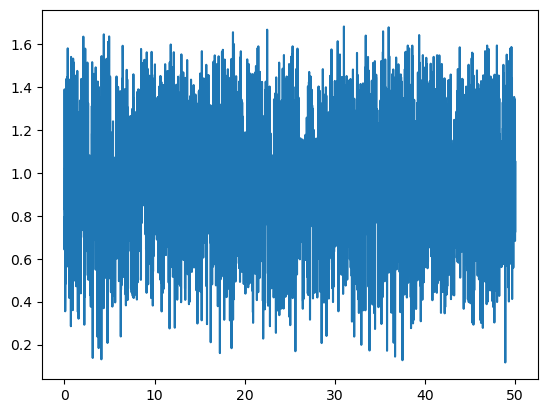

In [70]:
plt.plot(puw.convert(times, 'nanoseconds'), distances[:,0,0])
plt.show()

Or lets just get the distance between the geometric centers of all residues at the 3000-th frame:

In [71]:
list_groups_1 = msm.get(molecular_system, element="group", selection="all", atom_index=True)
distances = msm.structure.get_distances(molecular_system, selection=list_groups_1, center_of_atoms=True,
                         structure_indices=3000)

In [72]:
distances.shape

(1, 7, 7)

In [73]:
print("The distance between geometric_center of group 2-th and group 4-th at frame 3000-th is: {}".format(distances[0,2,4]))

The distance between geometric_center of group 2-th and group 4-th at frame 3000-th is: 0.6818505282832528 nanometer


### Distances between atom groups positions in different structures

The method `molsysmt.distance()` works with atom groups just like with only atoms. There are two input arguments to select the coordinates of a set of atoms at two different structures:

In [75]:
molecular_system = msm.systems['pentalanine']['traj_pentalanine.h5']
molecular_system = msm.convert(molecular_system, to_form='molsysmt.MolSys')

In [76]:
msm.info(molecular_system)

form,n_atoms,n_groups,n_components,n_chains,n_molecules,n_entities,n_peptides,n_structures
molsysmt.MolSys,62,7,1,1,1,1,1,5000


Let see how `structure_indices_1` and `structure_indices_2` works in this context:

In [77]:
distances = msm.structure.get_distances(molecular_system,
                         selection="group_index==0", center_of_atoms=True,
                         structure_indices=100,
                         selection_2="group_index==6", center_of_atoms_2=True,
                         structure_indices_2=200)

In [78]:
distances.shape

(1, 1, 1)

The physical meaning of this former example is clear but not really useful, unless `selection` is the same as `selection_2` as we can see in the following section.

### Displacement distances of atom groups

The possibility to get the distance between the coordinates of an object at two different structures makes the obtention of atom groups displacements straightforward. Lets plot the distance walked by the 0-th group of the former pentalanine peptide between consecutive structures of the trajectory store in `pentalanine.h5`:

In [80]:
molecular_system = msm.systems['pentalanine']['traj_pentalanine.h5']
molecular_system = msm.convert(molecular_system, to_form='molsysmt.MolSys')

In [81]:
n_structures = msm.get(molecular_system, n_structures=True)

In [82]:
all_structure_indices = np.arange(n_structures)

In [83]:
displacements = msm.structure.get_distances(molecular_system, selection="group_index==0", center_of_atoms=True,
                             structure_indices=all_structure_indices[:-1], structure_indices_2=all_structure_indices[1:])

In [84]:
time = msm.get(molecular_system, element='system', structure_indices=all_structure_indices[:-1], time=True)

/conda/miniconda3/envs/MolSysMT@uibcdf_3.10/lib/python3.10/site-packages/matplotlib/cbook.py:1345: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  return np.asarray(x, float)


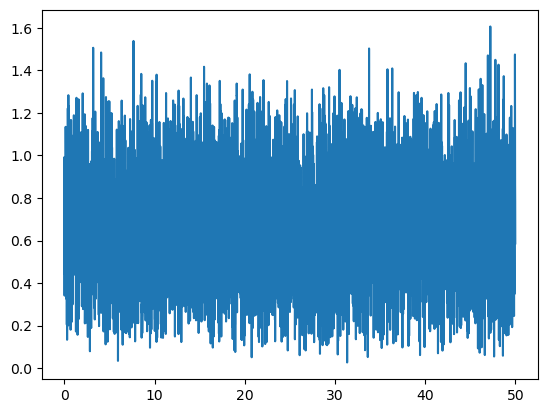

In [85]:
plt.plot(puw.convert(time,'ns'), displacements[:,0,0])
plt.show()

Or we can, for instance, get the distance of the center of mass of the whole molecule from the initial configuration to every time step along the trajectory:

In [86]:
displacements = msm.structure.get_distances(molecular_system, selection="all",
                                            structure_indices=np.zeros(n_structures, dtype=int),
                                            structure_indices_2=all_structure_indices)

In [87]:
displacements[1000,30,30]

0.45176813186030235 <Unit('nanometer')>

In [88]:
time = msm.get(molecular_system, element='system', time=True)

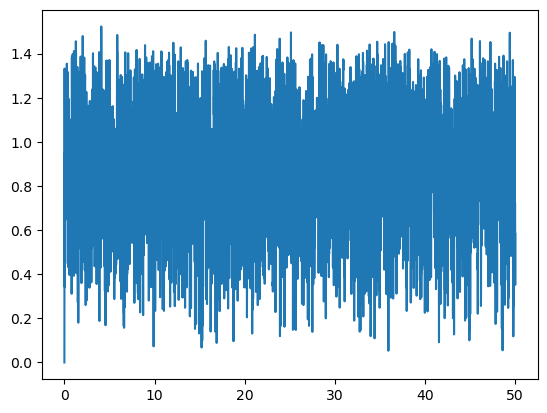

In [89]:
plt.plot(puw.convert(time, 'ns'), displacements[:,0,0])
plt.show()

### Distance between pairs of groups of atoms

Lets see the following example where all distances betweeen the geometric center of the residues of pentalanine is computed along a short trajectory:

In [91]:
molecular_system = msm.systems['pentalanine']['traj_pentalanine.h5']
molecular_system = msm.convert(molecular_system, to_form='molsysmt.MolSys')

In [92]:
list_atom_groups = msm.get(molecular_system, element='group', selection='all', atom_index=True)

In [93]:
list_atom_groups

[[0, 1, 2, 3, 4, 5],
 [6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
 [16, 17, 18, 19, 20, 21, 22, 23, 24, 25],
 [26, 27, 28, 29, 30, 31, 32, 33, 34, 35],
 [36, 37, 38, 39, 40, 41, 42, 43, 44, 45],
 [46, 47, 48, 49, 50, 51, 52, 53, 54, 55],
 [56, 57, 58, 59, 60, 61]]

In [94]:
distances = msm.structure.get_distances(molecular_system, selection=list_atom_groups,
                         center_of_atoms=True)

In [95]:
distances.shape

(5000, 7, 7)

The method worked needlessly computing the distances between different groups twice, as well as getting the distance between a geometric center to the its self for every residue. This can be avoided thanks to the input argument `pairs=True`. Using `pairs=True`, as it can be seen in the corresponding section about distances of atoms pairs, the distances between atom groups pairs made by consecutive elements of two zipped lists are obtained. Lets see this with a pratical case:

In [96]:
from itertools import combinations 

list_atom_groups_1=[]
list_atom_groups_2=[]
aux_list_1=[]
aux_list_2=[]

for ii,jj in combinations(range(7), 2):
    print('{}.vs.{}'.format(ii,jj))
    aux_list_1.append(ii)
    aux_list_2.append(jj)
    list_atom_groups_1.append(list_atom_groups[ii])
    list_atom_groups_2.append(list_atom_groups[jj])

0.vs.1
0.vs.2
0.vs.3
0.vs.4
0.vs.5
0.vs.6
1.vs.2
1.vs.3
1.vs.4
1.vs.5
1.vs.6
2.vs.3
2.vs.4
2.vs.5
2.vs.6
3.vs.4
3.vs.5
3.vs.6
4.vs.5
4.vs.6
5.vs.6


In [98]:
distances = msm.structure.get_distances(molecular_system, selection=list_atom_groups_1, center_of_atoms=True,
                         selection_2=list_atom_groups_2, center_of_atoms_2=True, pairs=True)

In [99]:
distances.shape

(5000, 21)

Lets plot the distance of a given pair, 12-th p.e., defined by the groups:

In [100]:
print('The 12-th pair is made by groups {}-th and {}-th, and its distance along the trajectory is:'.format(aux_list_1[12], aux_list_2[12]))

The 12-th pair is made by groups 2-th and 4-th, and its distance along the trajectory is:


/conda/miniconda3/envs/MolSysMT@uibcdf_3.10/lib/python3.10/site-packages/matplotlib/cbook.py:1345: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  return np.asarray(x, float)


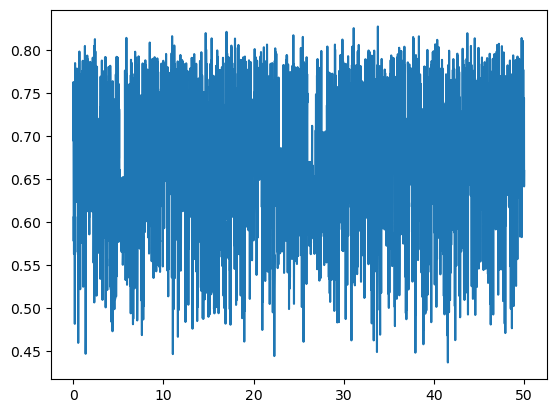

In [101]:
time = msm.get(molecular_system, element='system', time=True)
plt.plot(puw.convert(time, 'ns'), distances[:,12])
plt.show()